In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

import xgboost as xgb

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [4]:
data = data[data['ca'] < 4] #drop the wrong ca values
data = data[data['thal'] > 0] # drop the wong thal value
print(f'The length of the data now is {len(data)} instead of 303!')

The length of the data now is 296 instead of 303!


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder


In [11]:
def label_encode_cat_features(data, cat_features):
    '''
    Given a dataframe and its categorical features, this function returns label-encoded dataframe
    '''
    
    label_encoder = LabelEncoder()
    data_encoded = data.copy()
    
    for col in cat_features:
        data_encoded[col] = label_encoder.fit_transform(data[col])
    
    data = data_encoded
    
    return data


def score_summary(names, classifiers):
    '''
    Given a list of classiers, this function calculates the accuracy, 
    ROC_AUC and Recall and returns the values in a dataframe
    '''
    
    cols=["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
    data_table = pd.DataFrame(columns=cols)
    
    for name, clf in zip(names, classifiers):        
        clf.fit(X_train, y_train)
        
        pred = clf.predict(X_val)
        accuracy = accuracy_score(y_val, pred)

        pred_proba = clf.predict_proba(X_val)[:, 1]
        
        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)        
        roc_auc = auc(fpr, tpr)
        
        # confusion matric, cm
        cm = confusion_matrix(y_val, pred) 
        
        # recall: TP/(TP+FN)
        recall = cm[1,1]/(cm[1,1] +cm[1,0])
        
        # precision: TP/(TP+FP)
        precision = cm[1,1]/(cm[1,1] +cm[0,1])
        
        # F1 score: TP/(TP+FP)
        f1 = 2*recall*precision/(recall + precision)

        df = pd.DataFrame([[name, accuracy*100, roc_auc, recall, precision, f1]], columns=cols)
        data_table = data_table.append(df)     

    return(np.round(data_table.reset_index(drop=True), 2))


def plot_conf_matrix(names, classifiers, nrows, ncols, fig_a, fig_b):
    '''
    Plots confusion matrices in a subplots.
    
    Args:
        names : list of names of the classifier
        classifiers : list of classification algorithms
        nrows, ncols : number of rows and rows in the subplots
        fig_a, fig_b : dimensions of the figure size
    '''
       
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_a, fig_b))
    
    i = 0
    for clf, ax in zip(classifiers, axes.flatten()):
        
        clf.fit(X_train, y_train)
        plot_confusion_matrix(clf, X_val, y_val, ax=ax)
        ax.title.set_text(names[i])
        i = i + 1       
        
    plt.tight_layout() 
    plt.show()
    
    
def roc_auc_curve(names, classifiers):
    '''
    Given a list of classifiers, this function plots the ROC curves
    
    '''       
    plt.figure(figsize=(12, 8))   
        
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        
        pred_proba = clf.predict_proba(X_val)[:, 1]
        
        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, lw=3, label= name +' ROC curve (area = %0.2f)' % (roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic (ROC) curves', fontsize=20)
        plt.legend(loc="lower right")

In [13]:
# split the data into train and test sets


data = label_encode_cat_features(data, cat_features)

seed = 0
test_size = 0.25

features = data.columns[:-1]

X = data[features]
y = data['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = test_size, random_state=seed)


# classifier algorithms with default parameters

names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Support Vectors',
    'Nu SVC',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
    'Quadratic DA',
    "Neural Net"
]

classifiers = [
    LogisticRegression(solver="liblinear", random_state=seed),
    KNeighborsClassifier(2),
    SVC(probability=True, random_state=seed),
    NuSVC(probability=True, random_state=seed),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(random_state=seed),
]

NameError: name 'cat_features' is not defined

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [2]:
df = pd.read_csv('heart_failure_clinical_records.csv')
X = df.iloc[:,0:12]
y = df.iloc[:,-1]


In [3]:
df


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [5]:

rf = RandomForestClassifier( random_state=1,
    max_depth=26,
        n_estimators=50,
        min_samples_leaf=5,
        max_features=2)
rf.fit(X_train_std, y_train)
y_predict = rf.predict(X_test_std)
accuracy_score(y_test, y_predict)

0.8444444444444444

In [6]:
cm = confusion_matrix(y_test, y_predict)
acc=accuracy_score(y_test, y_predict)
pre=precision_score(y_test, y_predict)
rec=recall_score(y_test, y_predict)
f1=f1_score(y_test, y_predict)
specificity = recall_score(np.logical_not(y_test) , np.logical_not(y_predict))
specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print(f"Accuracy = {acc} , Precission = {pre} , Recall = {rec} , F1 Score = {f1} ")


Accuracy = 0.8444444444444444 , Precission = 0.8571428571428571 , Recall = 0.6206896551724138 , F1 Score = 0.7200000000000001 


In [7]:
def plot_roc(y_test,probs):
    fpr,tpr,threshold=roc_curve(y_test,probs)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.5f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.5f'%roc_auc,color='red')
    plt.legend(loc='lower right', fontsize='xx-large')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.15])
    plt.xlabel('False Positive Rate', fontsize='xx-large')
    plt.ylabel('True Positive Rate', fontsize='xx-large')
    plt.xticks(fontsize='xx-large')  
    plt.yticks(fontsize='xx-large')  
    plt.grid(True)  
    plt.show()
    plt.show()



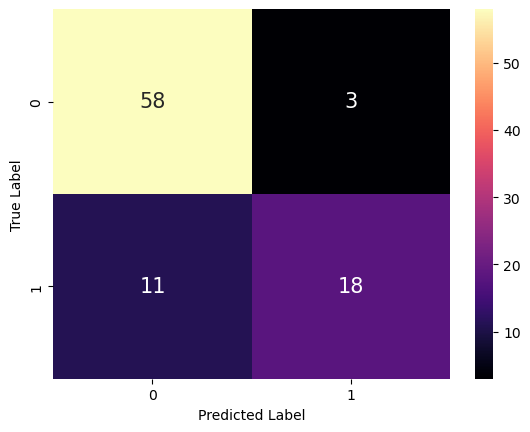

ROC AUC=0.78575


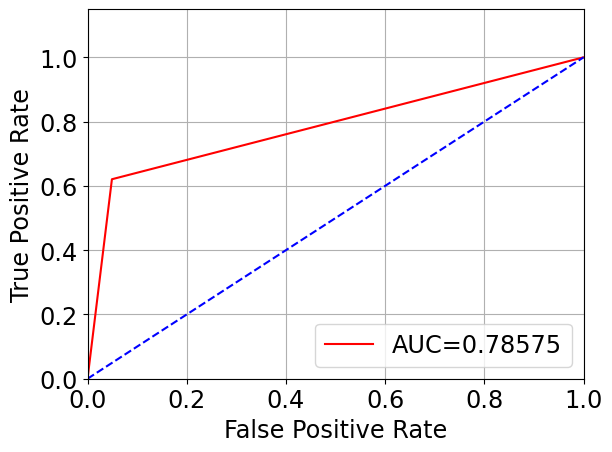

In [8]:
heatmap=sns.heatmap(cm, annot=True,   fmt='d', cmap='magma', annot_kws={"fontsize":15})
plt.xlabel('Predicted Label', fontsize=10)
plt.ylabel('True Label', fontsize=10)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
plot_roc(y_test, y_predict)



In [9]:
#Badger
X.describe()
X1=df[['ejection_fraction', 'time']]

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X1, y, test_size=0.3, random_state=10, stratify=y
)

sc1 = StandardScaler()
sc1.fit(X_train1)
X_train_std1 = sc1.transform(X_train1)
X_test_std1 = sc1.transform(X_test1)

In [10]:
rf1 = RandomForestClassifier(random_state=10,
    max_depth=26,
        n_estimators=50,
        min_samples_leaf=5,
        max_features=2)
rf1.fit(X_train_std1, y_train1)
y_predict1 = rf1.predict(X_test_std1)
accuracy_score(y_test1, y_predict1)


0.8222222222222222

Accuracy = 0.8222222222222222 , Precission = 0.782608695652174 , Recall = 0.6206896551724138 , F1 Score = 0.6923076923076923 


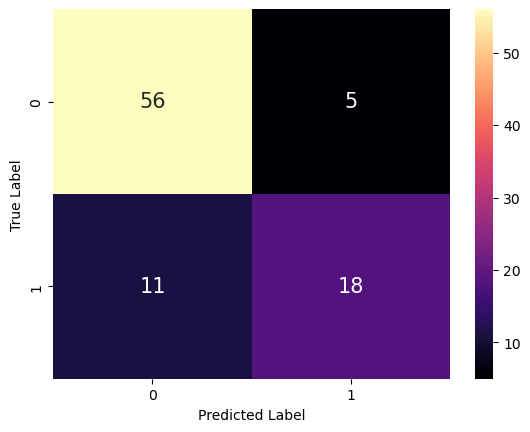

ROC AUC=0.76936


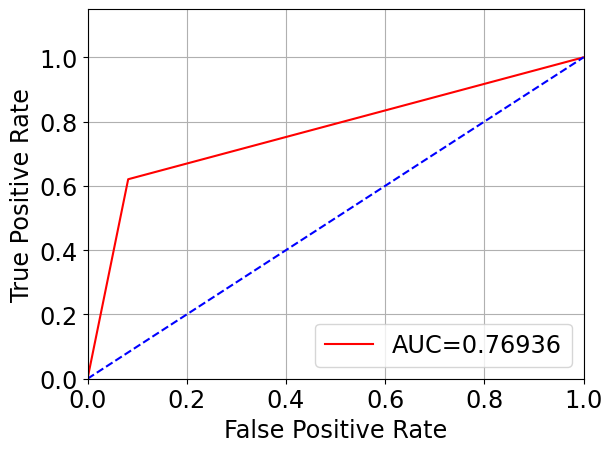

In [11]:

cm1 = confusion_matrix(y_test1, y_predict1)

acc1=accuracy_score(y_test1, y_predict1)
pre1=precision_score(y_test1, y_predict1)
rec1=recall_score(y_test1, y_predict1)
f1_1=f1_score(y_test1, y_predict1)
specificity1 = recall_score(np.logical_not(y_test1) , np.logical_not(y_predict1))
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print(f"Accuracy = {acc1} , Precission = {pre1} , Recall = {rec1} , F1 Score = {f1_1} ")

#confussion matrix
heatmap=sns.heatmap(cm1, annot=True,   fmt='d', cmap='magma', annot_kws={"fontsize":15})
plt.xlabel('Predicted Label', fontsize=10)
plt.ylabel('True Label', fontsize=10)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
plot_roc(y_test1, y_predict1)


Accuracy = 0.8333333333333334 , Precission = 0.7692307692307693 , Recall = 0.6896551724137931 , F1 Score = 0.7272727272727274 


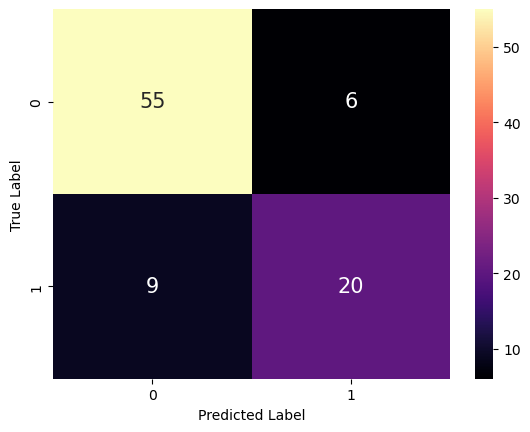

ROC AUC=0.79565


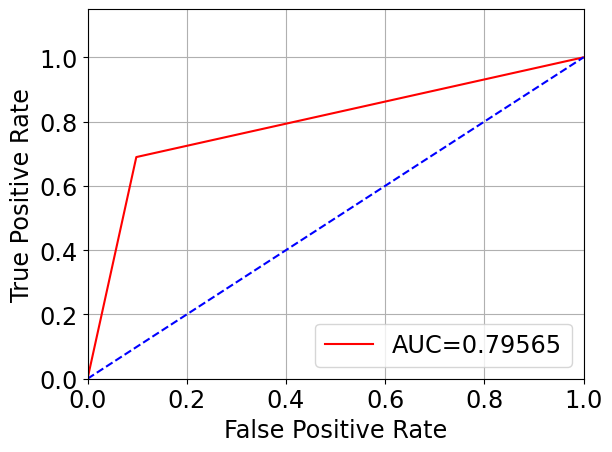

In [16]:
#slim mould
X2=df[[ 'time','ejection_fraction','anaemia','serum_creatinine']]

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y, test_size=0.3, random_state=1, stratify=y
)

sc2 = StandardScaler()
sc2.fit(X_train2)
X_train_std2 = sc2.transform(X_train2)
X_test_std2 = sc2.transform(X_test2)
rf1.fit(X_train_std2, y_train2)
y_predict2 = rf1.predict(X_test_std2)

cm2 = confusion_matrix(y_test2, y_predict2)
acc2=metrics.accuracy_score(y_test2, y_predict2)
pre2=precision_score(y_test2, y_predict2)
rec2=recall_score(y_test2, y_predict2)
f1_1_2=f1_score(y_test2, y_predict2)
specificity2 = recall_score(np.logical_not(y_test2) , np.logical_not(y_predict2))
specificity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print(f"Accuracy = {acc2} , Precission = {pre2} , Recall = {rec2} , F1 Score = {f1_1_2} ")

#confussion matrix
heatmap=sns.heatmap(cm2, annot=True,   fmt='d', cmap='magma', annot_kws={"fontsize":15})
plt.xlabel('Predicted Label', fontsize=10)
plt.ylabel('True Label', fontsize=10)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
plot_roc(y_test2, y_predict2)


Accuracy = 0.8444444444444444 , Precission = 0.8 , Recall = 0.6896551724137931 , F1 Score = 0.7407407407407408 


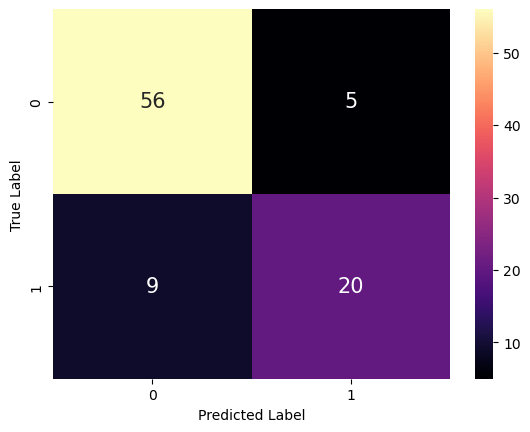

ROC AUC=0.80384


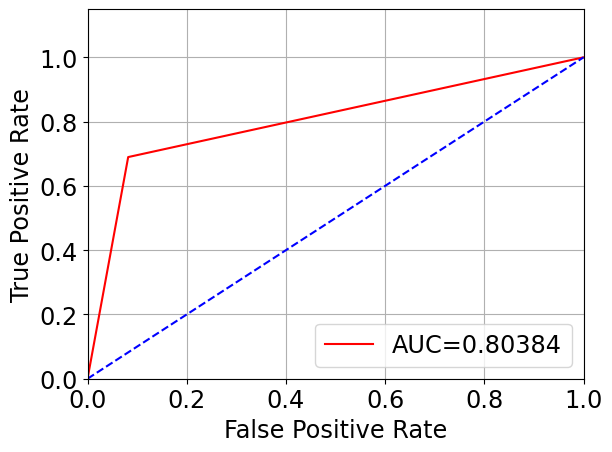

In [12]:
X2=df[[ 'ejection_fraction', 'time','diabetes','serum_creatinine']]

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y, test_size=0.3, random_state=10, stratify=y
)

sc2 = StandardScaler()
sc2.fit(X_train2)
X_train_std2 = sc2.transform(X_train2)
X_test_std2 = sc2.transform(X_test2)
rf1.fit(X_train_std2, y_train2)
y_predict2 = rf1.predict(X_test_std2)

cm2 = confusion_matrix(y_test2, y_predict2)
acc2=metrics.accuracy_score(y_test2, y_predict2)
pre2=precision_score(y_test2, y_predict2)
rec2=recall_score(y_test2, y_predict2)
f1_1_2=f1_score(y_test2, y_predict2)
specificity2 = recall_score(np.logical_not(y_test2) , np.logical_not(y_predict2))
specificity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print(f"Accuracy = {acc2} , Precission = {pre2} , Recall = {rec2} , F1 Score = {f1_1_2} ")

#confussion matrix
heatmap=sns.heatmap(cm2, annot=True,   fmt='d', cmap='magma', annot_kws={"fontsize":15})
plt.xlabel('Predicted Label', fontsize=10)
plt.ylabel('True Label', fontsize=10)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
plot_roc(y_test2, y_predict2)


In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [35]:
df = pd.read_csv('heart_failure_clinical_records.csv')
X = df.iloc[:,0:12]
y = df.iloc[:,-1]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [73]:
rf = RandomForestClassifier( 
    max_depth=26,
        n_estimators=50,
        min_samples_leaf=5,
        max_features=2)

In [74]:

k_folds = KFold(n_splits = 10)

scores = cross_val_score(rf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.6        0.76666667 0.7        0.86666667 0.86666667 0.86666667
 0.7        0.9        0.93333333 1.        ]
Average CV Score:  0.8200000000000001
Number of CV Scores used in Average:  10


In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [76]:
rf = RandomForestClassifier()

In [77]:
k_folds = KFold(n_splits = 10)

scores = cross_val_score(rf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.9        0.83333333 0.8        0.76666667 0.86666667 0.83333333
 0.7        0.8        0.93333333 1.        ]
Average CV Score:  0.8433333333333334
Number of CV Scores used in Average:  10
